In [1]:
from huggingface_hub import login
from google.colab import userdata


hf_token = userdata.get('hf_shah1st')

login(token=hf_token)

In [2]:
import torch
from diffusers import FluxPipeline

torch.cuda.empty_cache()

# Load the base model with optimizations
pipeline = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    torch_dtype=torch.bfloat16,  # Use bfloat16 for speed
    #device_map="balanced"  # Automatically manage device placement
)

# Load your LoRA weights
lora_path = "/content/drive/MyDrive/Datasources/Datasets/skin_cancer_flux_lora"
pipeline.load_lora_weights(lora_path, weight_name='skin_cancer_flux_lora.safetensors')


# Move to GPU and optimize memory usage
#pipeline = pipeline.to("cuda")
pipeline.enable_model_cpu_offload()  # Only keep what's needed on GPU

# Reduce inference steps for faster generation
prompt = "SKINCANCER: Dermatoscopic image of a common nevus, fully symmetrical shape, with uniform dark brown coloration"
image = pipeline(
    prompt=prompt,
    num_inference_steps=20,  # Reduced from 28
    guidance_scale=3.5,
    height=512,
    width=512,
).images[0]

# Save the image
image

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.53G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

(…)pytorch_model-00001-of-00003.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

(…)pytorch_model-00002-of-00003.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

(…)pytorch_model-00003-of-00003.safetensors:   0%|          | 0.00/3.87G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


  0%|          | 0/20 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 90.00 MiB. GPU 0 has a total capacity of 22.16 GiB of which 13.38 MiB is free. Process 7185 has 22.14 GiB memory in use. Of the allocated memory 21.90 GiB is allocated by PyTorch, and 21.26 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

  0%|          | 0/28 [00:00<?, ?it/s]

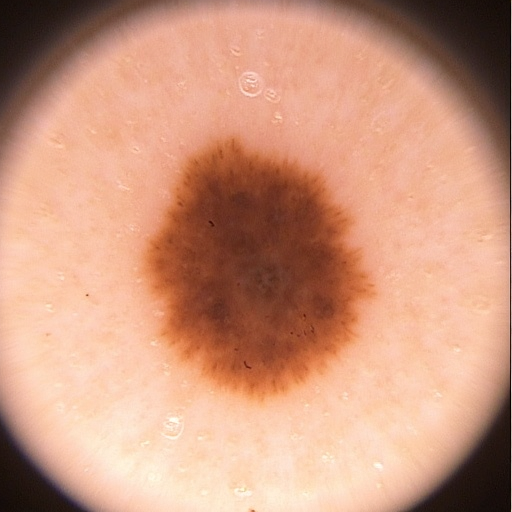

In [3]:
image = pipeline(
    prompt=prompt,
    num_inference_steps=28,  # Reduced from 28
    guidance_scale=3.5,
    height=512,
    width=512,
).images[0]
image

  0%|          | 0/28 [00:00<?, ?it/s]

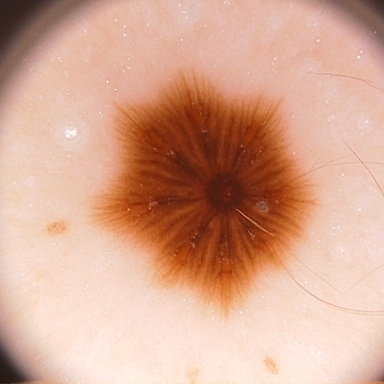

In [4]:
image = pipeline(
    prompt=prompt,
    num_inference_steps=28,  # Reduced from 28
    guidance_scale=3.5,
    height=384,
    width=384,
).images[0]
image

  0%|          | 0/20 [00:00<?, ?it/s]

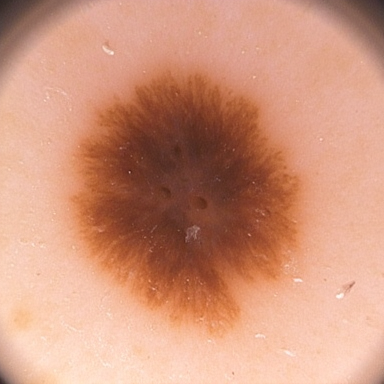

In [5]:
image = pipeline(
    prompt=prompt,
    num_inference_steps=20,  # Reduced from 28
    guidance_scale=3.5,
    height=384,
    width=384,
).images[0]
image